This example demonstrates advanced visualization techniques using HoloViews with the Bokeh plotting backend. You'll learn how to:

1. Display multiple timeseries from different data groups in a single plot using `subcoordinate_y`.
2. Normalize the timeseries per data group.
3. Create and link a minimap to the main plot with `RangeToolLink`.

Specifically, we'll simulate [Electroencephalography](https://en.wikipedia.org/wiki/Electroencephalography) (EEG) and position data, plot it, and then create a minimap based on the [z-score](https://en.wikipedia.org/wiki/Standard_score) of the data for easier navigation.

## Generating data

Let's start by `EEG` and position (`POS`) data. We'll create a timeseries for each EEG channel using sine waves with varying frequencies, and random data for three position channels. We'll set these two data groups to have different amplitudes and units.

In [2]:
%load_ext autoreload 
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
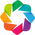

In [3]:
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews.operation.normalization import subcoordinate_group_ranges
from holoviews.plotting.links import RangeToolLink
from scipy.stats import zscore

hv.extension('bokeh')

GROUP_EEG = 'EEG'
GROUP_POS = 'Position'
N_CHANNELS_EEG = 10
N_CHANNELS_POS = 3
N_SECONDS = 5
SAMPLING_RATE_EEG = 200
SAMPLING_RATE_POS = 25
INIT_FREQ = 2  # Initial frequency in Hz
FREQ_INC = 5  # Frequency increment
AMPLITUDE_EEG = 1000  # EEG amplitude multiplier
AMPLITUDE_POS = 2  # Position amplitude multiplier

# Generate time for EEG and position data
total_samples_eeg = N_SECONDS * SAMPLING_RATE_EEG
total_samples_pos = N_SECONDS * SAMPLING_RATE_POS
time_eeg = np.linspace(0, N_SECONDS, total_samples_eeg)
time_pos = np.linspace(0, N_SECONDS, total_samples_pos)

# Generate EEG timeseries data
def generate_eeg_data(index):
    return AMPLITUDE_EEG * np.sin(2 * np.pi * (INIT_FREQ + index * FREQ_INC) * time_eeg)

eeg_channels = [str(i) for i in np.arange(N_CHANNELS_EEG)]
eeg_data = np.array([generate_eeg_data(i) for i in np.arange(N_CHANNELS_EEG)])
eeg_df = pd.DataFrame(eeg_data.T, index=time_eeg, columns=eeg_channels)
eeg_df.index.name = 'Time'

# Generate position data
pos_channels = ['X', 'Y', 'Z'] # avoid lowercase 'x' and 'y' as channel/dimension names
pos_data = AMPLITUDE_POS * np.random.randn(N_CHANNELS_POS, total_samples_pos).cumsum(axis=1)
pos_df = pd.DataFrame(pos_data.T, index=time_pos, columns=pos_channels)
pos_df.index.name = 'Time'

## Visualizing EEG Data

Next, let's dive into visualizing the data. We construct each timeseries using a `Curve` element, assigning it a `group`, a `label` and setting `subcoordinate_y=True`. All these curves are then aggregated into a list per data group, which serves as the input for an `Overlay` element. Rendering this `Overlay` produces a plot where the timeseries are stacked vertically.

Additionally, we'll enhance user interaction by implementing a custom hover tool. This will display key information about the group, channel, time, and amplitude value when you hover over any of the curves.

In [5]:
hv.Curve([])

:Curve   [x]   (y)

In [ ]:
# Create a Curve per data series
def df_to_curves(df, kdim, vdim, color='black', group='EEG'):
    curves = []
    for i, (channel, channel_data) in enumerate(df.items()):
        ds = hv.Dataset((channel_data.index, channel_data), [kdim, vdim])
        curve = hv.Curve(ds, kdim, vdim, group=group, label=str(channel))
        curve.opts(
            subcoordinate_y=True, color=color if isinstance(color, str) else color[i], line_width=1, 
            hover_tooltips=hover_tooltips, tools=['xwheel_zoom'], line_alpha=.8,
        )
        curves.append(curve)
    return curves

hover_tooltips = [("Group", "$group"), ("Channel", "$label"), ("Time"), ("Value")]

vdim_EEG = hv.Dimension("Value", unit="µV")
vdim_POS = hv.Dimension("Value", unit="cm")
time_dim = hv.Dimension("Time", unit="s")

eeg_curves = df_to_curves(eeg_df, time_dim, vdim_EEG, color='black', group='EEG')
pos_curves = df_to_curves(pos_df, time_dim, vdim_POS, color=cc.glasbey_cool, group='POS')

# Combine EEG and POS curves into an Overlay
eeg_curves_overlay = hv.Overlay(eeg_curves, kdims="Channel")
pos_curves_overlay = hv.Overlay(pos_curves, kdims="Channel")
curves_overlay = (eeg_curves_overlay * pos_curves_overlay).opts(
    xlabel=time_dim.pprint_label, ylabel="Channel", show_legend=False, aspect=3, responsive=True,
)
curves_overlay

Note that the overlay above has multiple wheel-zoom tools in the toolbar, you can hover over the icons in the toolbar to reveal each of the first two control the Y-axis zoom of their respective data group within each curve's subcoordinate range, and the third wheel zoom tool controls the X-axis scale of all the curves together.

By default, all the curves, including across data groups, have the same y-axis range that is computed from the min and max across all channels. As a consequence, the position curves in blue, which have a much smaller amplitude than timeseries in the EEG data group, appear to be quite flat and are hard to inspect. To deal with this situation, we can transform the *Overlay* with the `subcoordinate_group_ranges` operation that will apply a min-max normalization of the timeseries per group.

In [ ]:
# Apply group-wise normalization
normalized_overlay = subcoordinate_group_ranges(curves_overlay)
normalized_overlay

## Creating the Minimap

A minimap can provide a quick overview of the data and help you navigate through it. We'll compute the z-score for each channel and represent it as an image; the z-score will normalize the data and bring out the patterns more clearly. To enable linking in the next step between the timeseries `Overlay` and the minimap `Image`, we ensure they share the same y-axis range. We will also leverage rasterization in case the full image resolution is too large to render on the screen.

In [ ]:
y_positions = range(N_CHANNELS_EEG + N_CHANNELS_POS)

# Reindex the lower frequency DataFrame to match the higher frequency index
pos_df_interp = pos_df.reindex(eeg_df.index).interpolate(method='index')

# concatenate the EEG and interpolated POS data and z-score the full data array
z_data = zscore(np.concatenate((eeg_df.values, pos_df_interp.values), axis=1), axis=0).T

minimap = rasterize(hv.Image((time_eeg, y_positions , z_data), [time_dim, "Channel"], "Value"))
minimap = minimap.opts(
    cmap="RdBu_r", xlabel='', alpha=.7,
    yticks=[(y_positions[0], f'EEG {eeg_channels[0]}'), (y_positions[-1], f'POS {pos_channels[-1]}')],
    height=120, responsive=True, toolbar='disable', cnorm='eq_hist'
)
minimap

## Building the dashboard

Finally, we use [`RangeToolLink`](../../../user_guide/Linking_Plots.ipynb) to connect the minimap `Image` and the timeseries `Overlay`, setting bounds for the initially viewable area with `boundsx` and `boundsy`, and finally demonstrate setting an upper max zoom range of 3 seconds with `intervalsx`. Once the plots are linked and assembled into a unified dashboard, you can interact with it. Experiment by dragging the selection box on the minimap or resizing it by clicking and dragging its edges.

In [ ]:
RangeToolLink(
    minimap, normalized_overlay, axes=["x", "y"],
    boundsx=(.5, 3), boundsy=(1.5, 12.5),
    intervalsx=(None, 3),
)

dashboard = (normalized_overlay + minimap).cols(1).opts(shared_axes=False)
dashboard